# AMAT503:  Lecture 21

April 5, 2018.  

Michael Lamoureux

### Continuous wavelet transform

### Complex Morelet wavelet transfrom

### Real Morelet wavelet transform

### Gabor transforms


In [2]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from pywt import *
from IPython.display import Audio

### Different transforms.

Recall from the last lecture that we have several similar, but different time/frequency, or time/inverse-frequency transforms.

There is the ** continuous wavelet transform **

$$W(a,b) = \frac{1}{|a|^{1/2}} \int_{\Bbb R}f(t) \psi(\frac{t-b}{a}) \, dt,$$
where $\psi$ is a general wavelet.

There is the ** complex Morelet wavelet transform ** which is a CWT with wavelet $\psi(t) = e^{-2^2}e^{-2\pi i t}$, and can be written as
$$
 CM(a,b) = \int_{\Bbb R}f(t) \psi_{a,b}(t) \, dt 
 =  \frac{1}{|a|^{1/2}} \int_{\Bbb R}f(t) e^{-\frac{(t-b)^2}{2a^2}} e^{-2\pi i (t-b)/a} \, dt.
$$

It is apparent that the substitution $\omega = 1/a$ turns this into somethign like a windowed Fourier transform, with $\omega$ the natural frequency. So we often write the CMT  in the form
$$
 CM(\omega^{-1},b)
 =  |\omega|^{1/2} \int_{\Bbb R}f(t) e^{-\omega^2(t-b)^2} e^{-2\pi i (t-b)\omega} \, dt.
$$

The **real Morlet transform** replaces the complex exponential with a cosine,
$$
 M(\omega^{-1},b)
 =  |\omega|^{1/2} \int_{\Bbb R}f(t) e^{-\omega^2(t-b)^2} \cos(2\pi (t-b)\omega) \, dt.
$$

There is a closely related transform, the ** S-transform**, created by
R. Stockwell in the 1990s, which is very popular among engineers. It  is defined as the integral
$$S({\omega},b) = |w| \int_{\Bbb R}f(t) e^{-\frac{(t-b)^2 {\omega}^2}{2}} e^{-2\pi i t {\omega}} \, dt.$$
It is essentially the continuous wavelet transform with a complex Morlet
wavelet, as defined above, but dropping the phase factor and using a
different amplitude adjustment. It can be inverted simply by integrating
over the $b$ variable, to obtain the usual Fourier transform of $f$,
which may be useful in some applications.

Another related, and well-studied transform is the **Gabor transform**,
created by Dennis Gabor in the 1940s. It fixes the width of the
Gaussians, so we write
$$G({\omega},b) = \int_{\Bbb R}f(t) e^{- \frac{(t-b)^2}{\sigma^2}} e^{-2\pi i t{\omega}} \, dt.$$
The fixed window width, as determined by constant $\sigma$, has its
advantages as well. This is a favourite of your prof, and has been the basis for advanced signal processing algorithm used in medical and seismic imaging.


### Making sounds

We can create a few sounds to listen to, then analyse



In [4]:
Fs = 8000
Len = 5
t = linspace(0,Len,Fs*Len)
f1 = 442.0
f2 = 440.0
signal = sin(2*pi*f1*t) + sin(2*pi*f2*t) 

Audio(data=signal, rate=Fs)

## Gabor transform


Let's define a Gabor transform first, since it is easy and fast.

In [37]:
# data is a vector of audio samples. window is the window, tstep is how much we step through
def gabor(data, window, tstep):
    out = zeros((size(window),round(size(data)/tstep)),dtype=complex_)
    k = 0
    while (k*tstep+size(window) <= size(data)):
        out[:,k] = fft(window*data[(k*tstep):(k*tstep+size(window))])
        k = k+1
    return out

In [44]:
# a sample signal. A ramp and a constant tone

Fs = 8000
Len = 5
t = linspace(0,Len,Fs*Len)
f1 = 1000.0
f2 = 2000.0
signal = sin(2*pi*f1*t) + sin(2*pi*f2*(t**2)/Len) 

Audio(data=signal, rate=Fs)

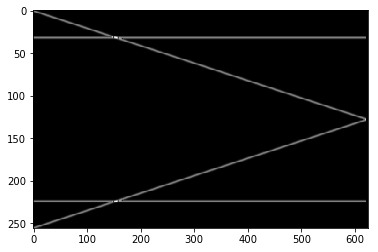

In [45]:
# Let's use a simple Gaussian for our window
wsize = 256  # the window size (power of 2)
wstep = 64   # the step size, usually a fraction of wsize

window = exp(-linspace(-2,2,wsize)**2)
x = gabor(signal, window,wstep)

imshow(abs(x),'gray', aspect='auto')

In [35]:
shape(x)

(50, 100)

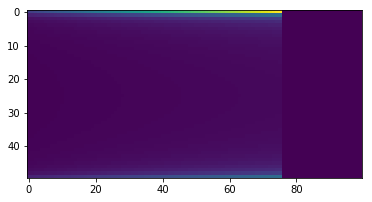

In [36]:
imshow(abs(x))

## Complex Morlet transform

I'm not sure how to do this fast. So we will just try something, see how it works.

We will model it on the Gabor transform above, as much as that is possible

In [94]:
def cmorlet(data, freqs, tstep, Fs):
    out = zeros((size(freqs),10+round(size(data)/tstep)),dtype=complex_)
    j=0
    for f in freqs:
        nmax = int(round(2*Fs/f))   # The number of samples in the window is proportional to Fs/f
        s = linspace(-nmax*f/Fs,nmax*f/Fs,2*nmax+1)
        window = exp(-(s**2)/4)*exp(-2*pi*1j*s)  # Maybe we have to increase the width of the Gaussian
        k = 0
        while (k*tstep+size(window) <= size(data)):
            out[j,k] = abs(f)*sum(window*data[(k*tstep):(k*tstep+size(window))])
            k = k+1
        j=j+1
    return out    
    
    
    

In [95]:
x = cmorlet(signal, linspace(100,3000,30),128,8000)

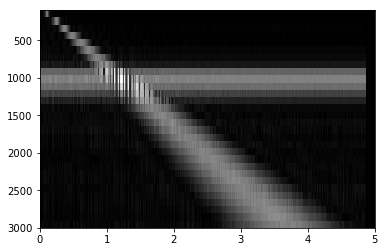

In [96]:
imshow(abs(x),'gray', aspect='auto', extent = (0,5,3000,100))

## Admissibility condition
-----------------------

Recall we had an admissibility condition to check. You should check this for the Morlet wavelet. (Turns out it is not admissible.) But again, recall the condition is
 that the constant
$$C_\psi = \int_{\Bbb R}\frac{ | \widehat{\psi}({\omega}) |^2}{|{\omega}|}d{\omega}$$
is finite and non-zero, where $\widehat{\psi}$ is the usual Fourier
transform of wavelet $\psi$. In particular, the $1/{\omega}$ singularity
must be cancelled by a zero of the Fourier transform of $\widehat{\psi}$
at ${\omega}=0$. This implies
$$\widehat{\psi}(0) = \int_R \psi(t) \, dt = 0,$$ from which we conclude
the wavelet $\psi$ has both negative and positive parts, which cancel
out on average. Informally, we see that $\psi$ must "wiggle" above and
below zero, so it really does have a wave-like behaviour.

In [97]:
t = linspace(0,1,10000);
t3 = linspace(0,.3333,3333);
x = sin(2*pi*440*t);
y = sin(2*pi*440*t**2);
z = concatenate((sin(2*pi*440*t3),sin(2*pi*880*t3),sin(2*pi*660*t3)));

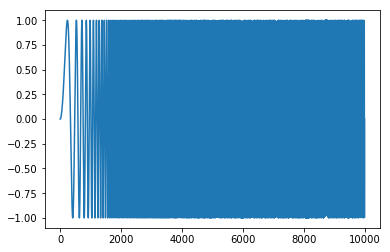

In [98]:
plot(y)

In [100]:
Audio(data=z, rate=10000)

## PyWavelets

Here we try using the Pywavelets package

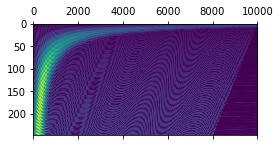

In [74]:
coef, freqs=cwt(y,arange(1,250),'cmor')
matshow(abs(coef),aspect=20)

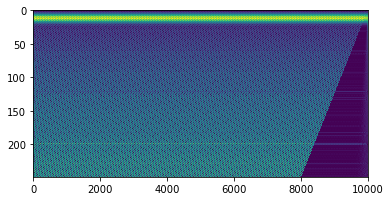

In [68]:
coef, freqs=cwt(x,arange(1,250),'cmor')
imshow(abs(coef),aspect=20)

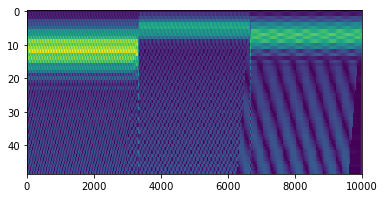

In [72]:
coef, freqs=cwt(z,arange(1,50),'cmor')
imshow(abs(coef),aspect=100)

In [15]:
wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

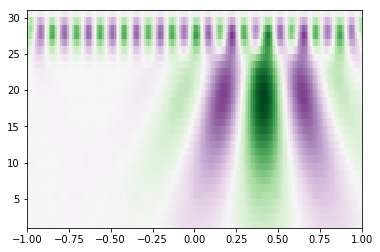

In [62]:
## From pwwavelets documentation
t = linspace(-1, 1, 200, endpoint=False)
sig  = cos(2 * pi * 7 * t) + real(exp(-7*(t-0.4)**2)*exp(1j*2*pi*2*(t-0.4)))
widths = arange(1, 31)
cwtmatr, freqs = cwt(sig, widths, 'mexh')
imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
       vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
show() 